# Effectuer une régression linéaire avec Scikit-learn

__Préambule__

Dans cette activité, faire appel à tout ce qui a été étudié dans la 2ème partie du cours. Quelle est la relation entre la distance qui nous sépare d'une galaxie, et la vitesse à laquelle cette galaxie s'éloigne de nous ?
Cette relation fut découverte pour la première fois par Erwin Hubble en 1929: http://www.pnas.org/content/15/3/168.full

__Jeu de données__

https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/decouvrez-les-librairies-python-pour-la-data-science/hubble_data.csv

__Enoncé__ 
- Charger le contenu de ce fichier grâce à Pandas, 
- Regarder les données qu'elle contient, 
- Effectuer une régression linéaire entre les deux variable distance et velocity, en utilisant la bibliothèque scikit-learn. Lien vers la documentation la plus appropriée: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

__Livrables__
- Visualiser vos résultats, avec des graphiques de qualité.
- Ces graphiques doivent inclure à la fois les points de données, et la courbe obtenue grâce à la régression linéaire.

In [150]:
# import de toutes les bibliothèques nécessaires
import numpy as np
import pandas as pd
# scikit learn est importée plus bas

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Exploration du fichier de données

In [151]:
# ouverture du fichier csv et lecture dans un dataframe
df = pd.read_csv('hubble_data.csv')  # pas besoin de préciser un encodage particulier

In [152]:
# visualisation de la "tête" des data 
df.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [153]:
# infos générales: nbre d'entrée, les types de données...
df.info()  # pas de données nulles à écarter

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
distance              24 non-null float64
recession_velocity    24 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [154]:
# visualisation de la "queue" des data 
df.tail(3)

,distance,recession_velocity
21,2.0,850
22,2.0,800
23,2.0,1090


In [155]:
df.shape # dimensions du tableau pour confirmation

(24, 2)

In [156]:
# visualisation vers le milieu de tableau 
df[10:15]

,distance,recession_velocity
10,0.8,300
11,0.9,-30
12,0.9,650
13,0.9,150
14,0.9,500


### Analyse des données

In [157]:
# résumé statistique: nbre de valeurs, moyennes, déviation standard, min/max, médiane & quartiles...
df.describe()

,distance,recession_velocity
count,24.000000,24.000000
mean,0.911375,373.125000
std,0.645496,371.254666
min,0.032000,-220.000000
25%,0.406250,165.000000
50%,0.900000,295.000000
75%,1.175000,537.500000
max,2.000000,1090.000000


In [158]:
# recherche de corrélation entre les 2 colonnes
df.corr() 

,distance,recession_velocity
distance,1.000000,0.789639
recession_velocity,0.789639,1.000000


#####  Le coefficient est proche de 1 il y a donc une forte corrélation positive.
On parle de corrélation au dessus de 0.35

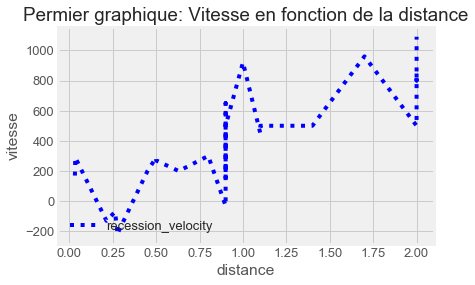

In [159]:
# premier graphique
plt.rcParams.update({'font.size': 13})      # change la taille de police par défaut

fig = plt.figure()
ax = plt.axes()

# spécification des variables, de la couleur et du style de trait
plt.plot(df["distance"], df["recession_velocity"], color='blue', linestyle='dotted')

plt.title("Permier graphique: Vitesse en fonction de la distance")   # titre

# La légende est générée à partir de l'argument label de la fonction
plt.legend(loc='lower left');

# Titres des axes
ax = ax.set(xlabel='distance', ylabel='vitesse')

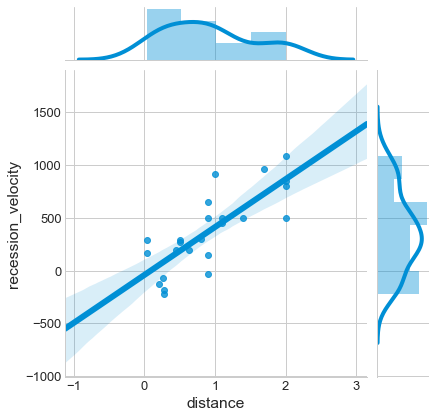

In [160]:
# visualisation d'ensemble pour se faire une idée générale, 
# avec histogrammes et distributions des valeurs (kde) ainsi qu'une 1ère régression linéaire par seaborn 
plt.style.use('seaborn-whitegrid')
sns.jointplot(df["distance"], df["recession_velocity"], data=df, kind="reg") # reg pour regression

### Régression linéaire avec Scikit-learn

Principe: https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire

"Un modèle de régression linéaire est un modèle de régression qui cherche à établir une relation linéaire entre une variable, dite expliquée, et une ou plusieurs variables, dites explicatives"

In [161]:
# import des différentes fonctions utiles de la bibliothèque sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [162]:
# instanciation d'un objet  à partir de la classe, qui est le conteneur du modèle de régression
modele_reg = LinearRegression()

In [163]:
# ajustement du modèle aux données d'entrainement, en x: distance & y:vitesse
X_train, y_train = df[["distance"]], df["recession_velocity"]
modele_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
# Une fois le modèle ajusté, affichage des coefficients, et de la constante
print("Coefficients: ", modele_reg.coef_, "\nLa constante: ", modele_reg.intercept_, )

Coefficients:  [454.15844092] 
La constante:  -40.78364909586048


In [165]:
y_train_predict = modele_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y, y_train_predict)))

r2 = modele_reg.score(X,y)

print("Performance du modèle sur la base d'apprentissage:")
# affiche l'erreur quadratique moyenne (l’erreur d’estimation) 
print(" - L'erreur quadratique moyenne vaut {:.2f}".format(rmse))
# et le R-square (la qualité du modèle de régression)
print(" - Le score r² vaut: {:.2f}".format(r2))

Performance du modèle sur la base d'apprentissage:
 - L'erreur quadratique moyenne vaut 222.99
 - Le score r² vaut: 0.62


__r² est inférieur à 1 ce qui est moyen, ceci peut s'expliquer par un jeu avec peu de données__

### Visualisation du modèle linéaire et du jeu de données

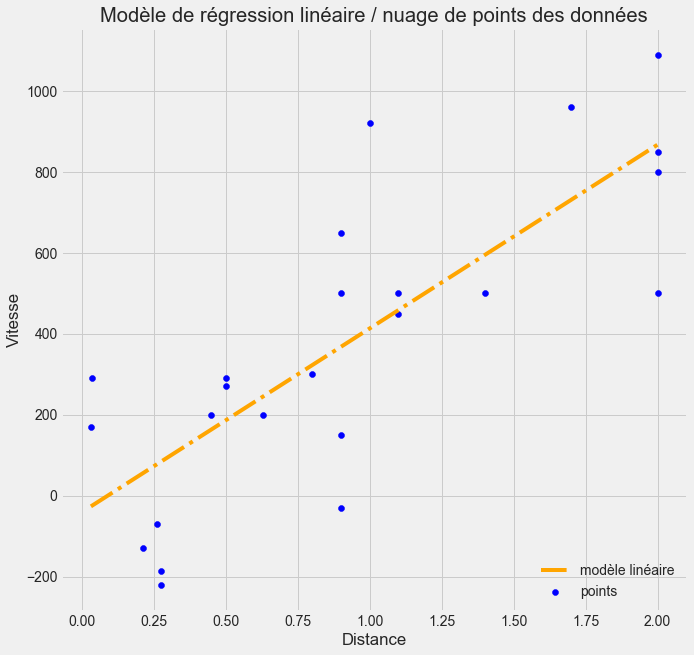

In [170]:
plt.rcParams.update({'font.size': 15})      # change la taille de police par défaut
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10,10))     # augmente la taille pour une meilleure visibilité
ax = plt.axes()

# nuage de points à partir des données dont on dispose:
plt.scatter(df["distance"], df["recession_velocity"], color='blue', label='points')

# prédiction des valeurs de y (vitesse) pour les valeurs de x(distance) du jeu de donnée
y_pred = modele_reg.predict(X_train)

# affichage du modèle de régression linéaire
plt.plot(X_train, y_pred, color='orange', linestyle='dashdot', label='modèle linéaire')

# Ajout d'un titre
plt.title("Modèle de régression linéaire / nuage de points des données")

# Labels pour les axes
ax = ax.set(xlabel='Distance', ylabel='Vitesse')

# La légende est générée à partir de l'argument label de la fonction
plt.legend(loc='lower right');

#plt.show()
#plt.plot(y, modeleReg.predict(X),'.')
#plt.plot(y, y-modeleReg.predict(X),'.')